
<br>
-------------------------------------------------------------------------------<br>
Name:        V2<br>
Purpose:     Simple P-control<br>
Author:      Christian Buchholz, Marcus Vogt<br>
Created:     01.12.2021<br>
Copyright:   Chair of Sustainable Manufacturing and Life Cycle Engineering, Institute of Machine Tools and Production Technology, Technische UniversitÃ¤t Braunschweig, Langer Kamp 19b, 38106 Braunschweig, Germany<br>
Licence:     MIT (see License)<br>
-------------------------------------------------------------------------------<br>


In [7]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import helpers.WetAirToolBox as WetAirToolBox
import V2

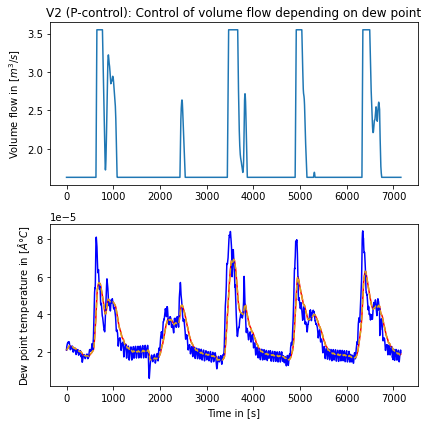

In [8]:
path = os.path.join(os.getcwd(),
                    "data", "t_step300_kp-30000_Tf4000_u_massflow.xlsx")
data = pd.read_excel(path, engine='openpyxl')
# Input temperature of supply air into room
T = 20
# Dew point temperature (Â°C) inside room
T_TP_set = -52
u = np.zeros(len(data.X_room_filt))
X = np.zeros(len(data.X_room_filt))
# iterate through filtered absolute moisture (mixing ratio)
for i in range(len(data.X_room_filt)):
    # first case needs to treated differently due to filtering iteration loop based on last value
    if i == 0:
        X[i] = V2.low_pass_filter(data.X_room[i], data.X_room[i])
        u[i] = V2.P_controller(data.X_room[i], WetAirToolBox.humidity_dewpoint2abs(T, T_TP_set))
    else:
        X[i] = V2.low_pass_filter(data.X_room[i], X[i-1])
        u[i] = V2.P_controller(X[i], WetAirToolBox.humidity_dewpoint2abs(T, T_TP_set))
fig, ax = plt.subplots(2, 1, figsize=(6, 6))
ax[0].plot(u)
ax[1].plot(data.X_room_filt, 'r')
ax[1].plot(data.X_room, 'b')
ax[1].plot(X, color='goldenrod', linestyle='--')
ax[0].set_title("V2 (P-control): Control of volume flow depending on dew point")
ax[1].set_xlabel("Time in [s]")
ax[0].set_ylabel(r"Volume flow in [$m^3/s$]")
ax[1].set_ylabel(r"Dew point temperature in [$Â°C$]")
plt.tight_layout()
plt.show()